# Diabetes Prediction Project

**Student Name: Sheikh Nasher**

**Date: December 12th, 2025**

**ISOM 835 2 Predictive Analytics and Machine Learning**

**Professor Hasan Arslan**


# Phase 1: Project Outline, Goals, and Dataset Preparation

This notebook begins the predictive analytics workflow for a diabetes prediction dataset.

### Phase 1 covers:
- Project outline and goals
- Dataset loading
- Initial review and cleanup

## Project Outline

### 1. Business Problem
In the age rapidly evovling Data Analytics, early diabetes detection can prevent long-term complications, reduce healthcare costs, and improve patient outcomes.  

Using key clinical features, this project aims to predict whether a patient has diabetes.

### 2. Project Objectives
- Build a supervised classification model to predict **Diagnosis**.
- Identify the most important predictors (Age, BMI, Glucose, etc.)
- Provide health-related actionable insights.
- Address ethical considerations around medical predictions.

### 3. Predictive Task
**Type:** Binary Classification  
**Target Variable:** `Diagnosis`  
- 0 = No diabetes  
- 1 = Diabetes  

### 4. Project Phases
1. Phase 1 — Outline + dataset load + cleanup  
2. Phase 2 — EDA
3. Phase 3 — Data Cleaning & Preprocessing  
4. Phase 4 — Model Development
5. Phase 5 — Interpretability and Business Insights
6. Phase 6 — Ethics and Responsible Machine Learning


In [40]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)

print("All libraries loaded successfully!")
print("You're ready to start your analysis!")

All libraries loaded successfully!
You're ready to start your analysis!


In [41]:
# Dataset Upload & Display
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
print("Dataset loaded successfully!")
print("\nFirst few rows:")
display(df.head())

Dataset loaded successfully!

First few rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [42]:
#Intial Inspection
print("Dataset Shape:", df.shape)
df.info()

print("\nSummary Statistics:")
df.describe(include='all')


Dataset Shape: (100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Summary Statistics:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [43]:
# Intial Cleanup

# Check duplicates
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

# Check missing values
df.isnull().sum()


Duplicates: 3854


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


## Dataset Feature Description

This dataset contains important information used to predict whether a patient has diabetes. The features are:

- **gender** — Male or Female  
- **age** — Patient age in years  
- **hypertension** — 1 = has hypertension, 0 = no  
- **heart_disease** — 1 = has heart disease, 0 = no  
- **smoking_history** — Categories: never, former, current, ever, No Info  
- **bmi** — Body Mass Index  
- **HbA1c_level** — A laboratory measure of long-term blood glucose control  
- **blood_glucose_level** — Blood glucose measured at a specific moment  
- **diabetes** — *Target variable* (1 = diabetic, 0 = non-diabetic)


# Phase 1 Summary

- After intial cleanup, the dataset does not have duplicates and no missing values

- The dataset contains 100,000 records. Each row represents an individual with demographic, clinical, and lifestyle attributes relevant to diabetes prediction. The dataset includes variables such as age, gender, hypertension, heart disease, smoking history, BMI, HbA1c level, and blood glucose level. The target variable, *diabetes*, indicates whether a patient has been diagnosed with diabetes (0 = no diabetes, 1 = diabetes).

- Then, a descriptive statistical analysis shows that the dataset is well-structured, with a mix of numerical and categorical features. Key diagnostic variables, such as HbA1c level and blood glucose level, provide a strong clinical signal, while additional lifestyle and health indicators support predictive modeling.

- Age ranges from infants to 80 years, with a mean of 41.88, indicating a broad age distribution across both younger and older adults. The diagnosis variable has a mean of 0.085, indicating that approximately 8.5% of the individuals in the dataset are diabetic, making this a moderately imbalanced yet suitable classification problem.

# Phase 2: Exploratory Data Analysis (EDA)
This section explores distributions, relationships, and patterns in the diabetes dataset. The goal is to understand feature behavior and prepare for preprocessing and modeling.


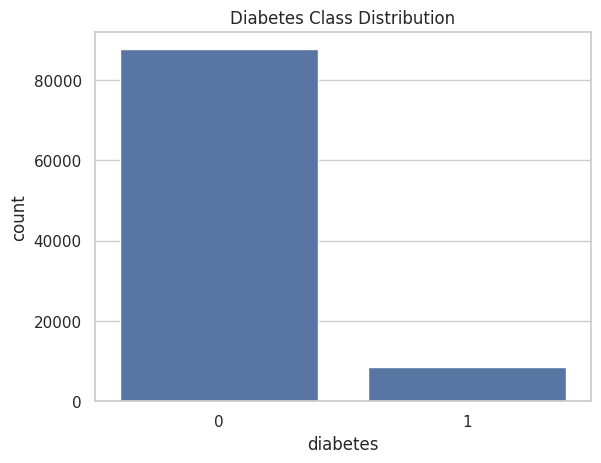


Class Counts: Counter({0: 87664, 1: 8482})

Percentage Breakdown:
 diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64


In [44]:
# Diabetes Class Distribtion Evaluation
from collections import Counter

# Viz 1: Distribution of Diabetes Class
sns.countplot(data=df, x='diabetes')
plt.title("Diabetes Class Distribution")
plt.show()

# Diabetes Class Count & Percentage Breakdown
print("\nClass Counts:", Counter(df['diabetes']))
perc = df['diabetes'].value_counts(normalize=True) * 100
print("\nPercentage Breakdown:\n", perc)

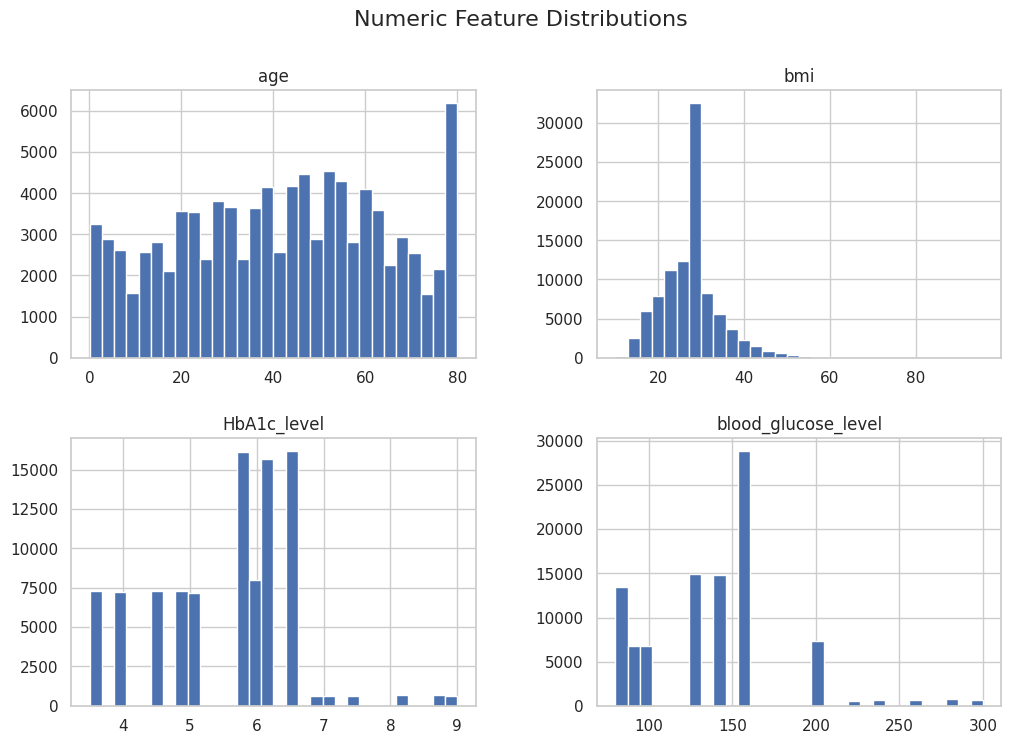

In [45]:
# Viz 2: Visualization of Distributions of all numeric columns
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()



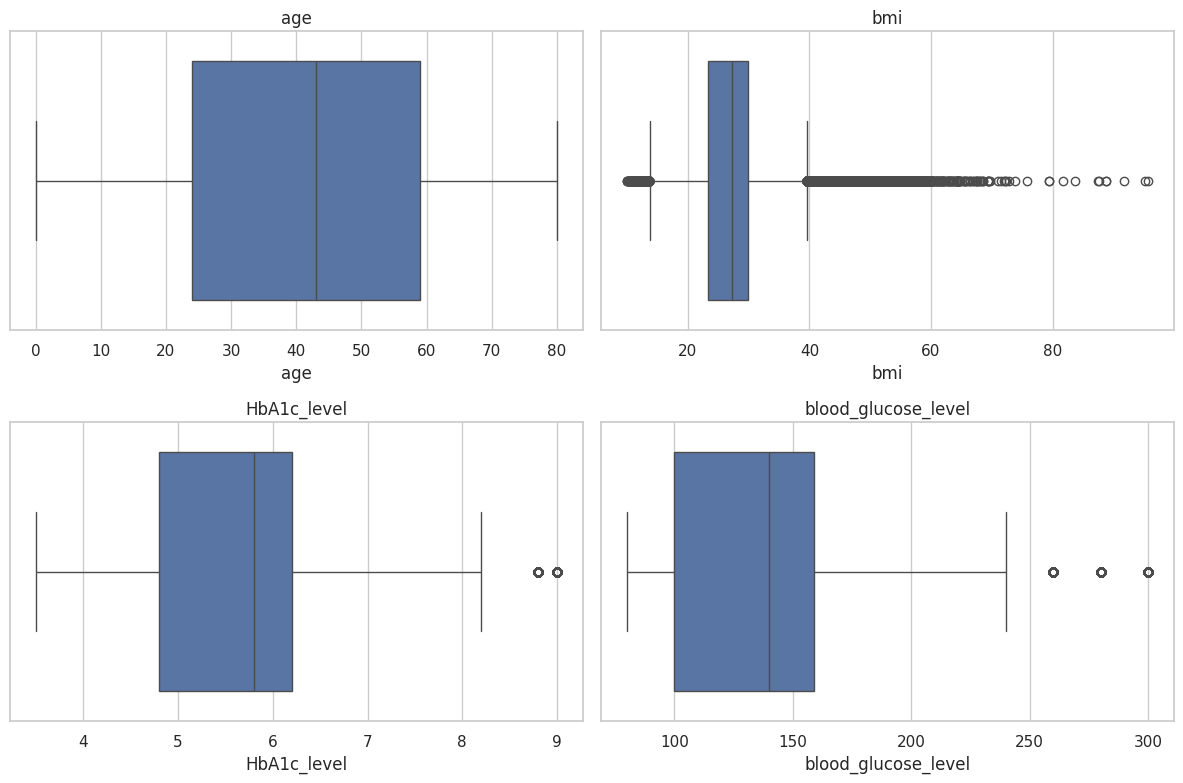

In [46]:
# Viz 3: Boxplots of all numeric columns
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()



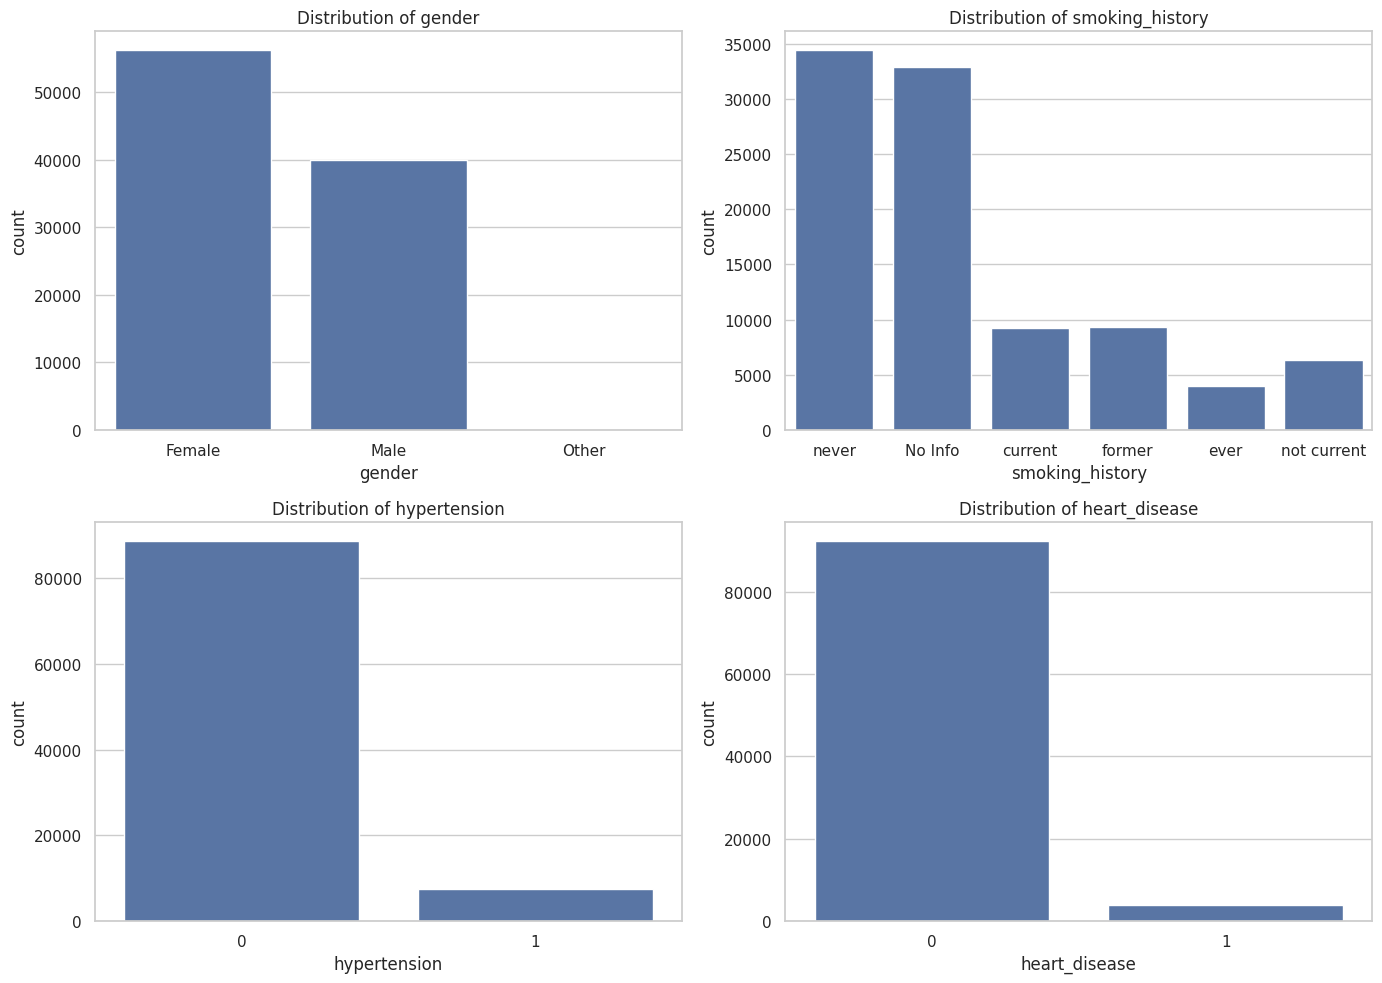

In [47]:
# Viz 4: Distribution of Categorical Features
cat_cols = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


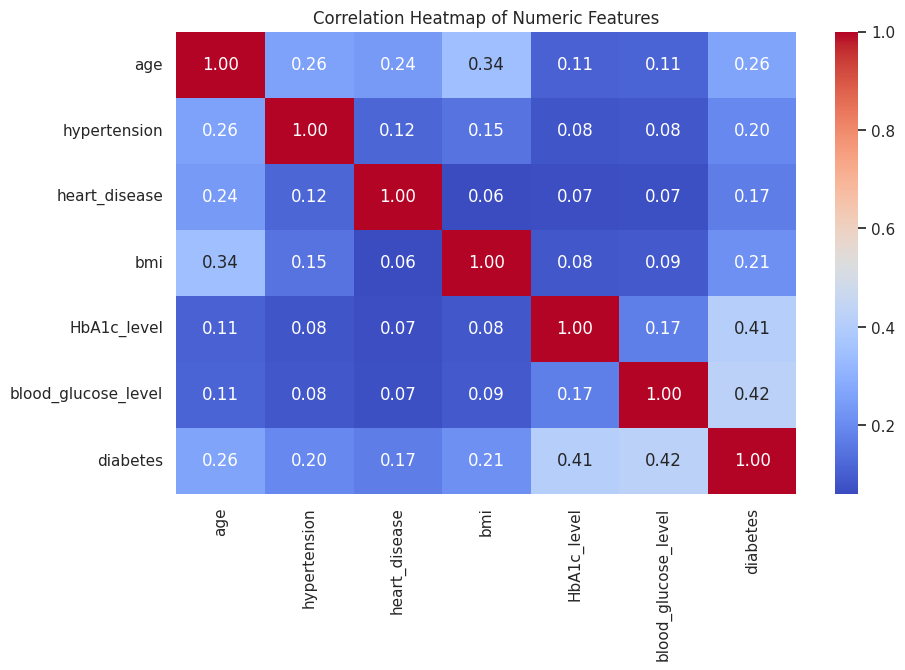

In [48]:
# Viz 5: Correlation Heatmap of Numeric Features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()




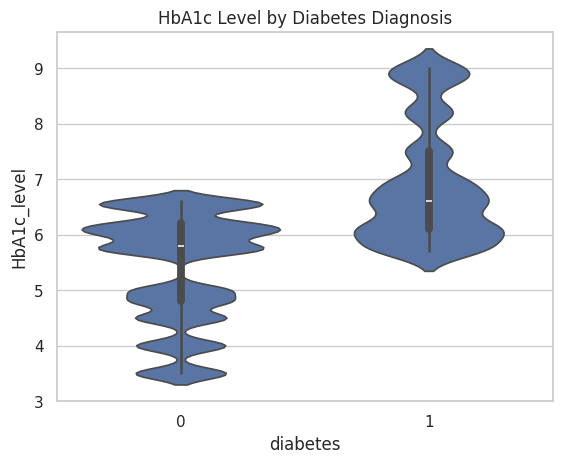

In [49]:
# Viz 5: Violin Plot for HbA1c by Diabetes
sns.violinplot(data=df, x='diabetes', y='HbA1c_level')
plt.title("HbA1c Level by Diabetes Diagnosis")
plt.show()



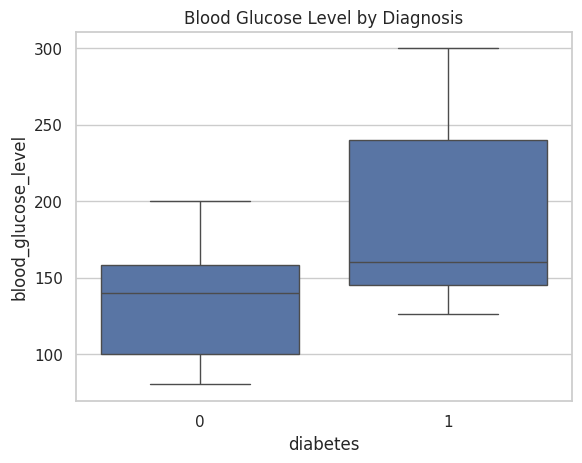

In [50]:
# Viz 6: Blood Glucose by Diabetes
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title("Blood Glucose Level by Diagnosis")
plt.show()


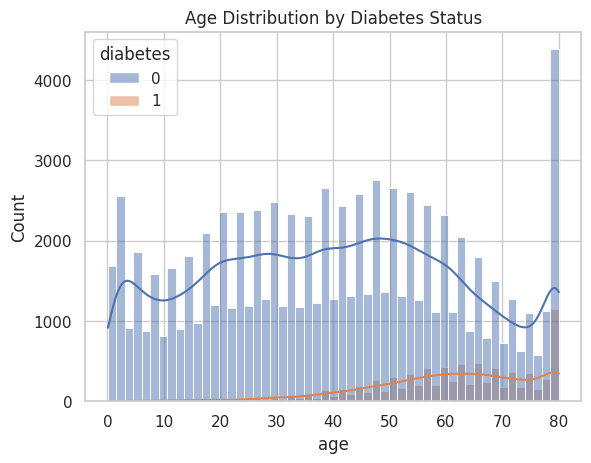

In [51]:
# Viz 7: Age by Diabetes
sns.histplot(data=df, x='age', hue='diabetes', kde=True)
plt.title("Age Distribution by Diabetes Status")
plt.show()



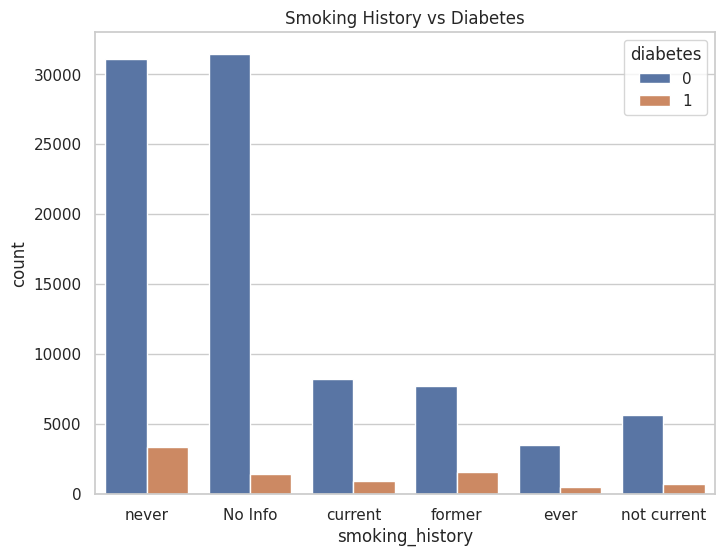

In [52]:
# Viz 8: Diabetes by Smoking History
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='smoking_history', hue='diabetes')
plt.title("Smoking History vs Diabetes")
plt.show()



#Phase 2 Summary — Exploratory Data Analysis (EDA)

In Phase 2, an exploratory analysis was conducted to understand the distribution, relationships, and quality of the clinical features within the diabetes dataset.

- The dataset is highly imbalanced: 91.18% of patients do NOT have diabetes, while only 8.82% do. This imbalance will be addressed during the modeling phase.

- Age, HbA1c level, and blood glucose level show relatively normal or modest distributions.


- BMI is right-skewed, indicating the dataset contains a large proportion of overweight or obese individuals.


- Gender distribution is predominantly female, which may reflect the data source rather than population-level sampling.


- Smoking history is dominated by “No Info” and “Never Smoked”, limiting its usefulness for predictive power.


- Most patients do not have hypertension or heart disease, suggesting these conditions are less represented in the dataset.

- Blood glucose level (0.42) and HbA1c level (0.41) show the strongest positive correlations with diabetes diagnosis. This aligns with clinical standards, where elevated glucose and HbA1c are key diagnostic markers. The correlations are moderate.

- Age, hypertension, heart disease, and BMI show weaker correlations. They contribute risk but are less strongly tied in a linear sense to diabetes diagnosis.

- Violin plot of HbA1c by diabetes diagnosis: Diabetic patients have substantially higher HbA1c values.

- Blood glucose boxplot by diagnosis: A clear upward shift for diabetic patients, confirming glucose is a major predictor.

- Age distribution by diagnosis: The likelihood of diabetes increases with age.

- Smoking history vs. diabetes: No strong visual or statistical pattern noticed, indicating smoking history may not be a strong predictor in this dataset.


# Phase 3: Preprocessing
In this phase, we prepare the diabetes dataset for machine learning models. Our goal is to transform the raw data from Phase 2 into a clean, standardized, and model-ready form, and then build our baseline model.

In [53]:
# Import required libraries for Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight


In [54]:
# Target, Numeric & Categorical Columns
# X should contain all columns EXCEPT Diabetes Column
# y should contain ONLY Diabetes Column

numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'smoking_history', 'hypertension',
                        'heart_disease']
target = 'diabetes'


In [55]:
# Train/Test Split

X = df[numeric_features +
       categorical_features] # We combine both Numeric & Categorical Features
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Data Split Complete!")
print(f"   Training set: {len(X_train)})")
print(f"   Testing set: {len(X_test)})")
print(f"   Number of features: {X_train.shape[1]}")
print(f"   Shape of Train & Test Data: {X_train.shape, X_test.shape}")

Data Split Complete!
   Training set: 76916)
   Testing set: 19230)
   Number of features: 8
   Shape of Train & Test Data: ((76916, 8), (19230, 8))


In [56]:
# Create Preprocessing Pipeline

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("Preprocessing Pipeline Complete!")


Preprocessing Pipeline Complete!


In [68]:
# Class Imbalance Inspection

print("Training Class Distribution:", Counter(y_train))
print("Testing Class Distribution:", Counter(y_test))

percentage = y_train.value_counts(normalize=True) * 100
print("\nPercentage in Training Set:\n", percentage)


Training Class Distribution: Counter({0: 70130, 1: 6786})
Testing Class Distribution: Counter({0: 17534, 1: 1696})

Percentage in Training Set:
 diabetes
0    91.177388
1     8.822612
Name: proportion, dtype: float64


# Phase 3 Summary
In Phase 3, the dataset was prepared for modeling by cleaning and transforming the raw data.

- First, we handled missing values. Numerical columns, such as BMI, were imputed using the median to avoid being influenced by outliers, while categorical fields like smoking history were filled using the most frequent category. After this step, the dataset contained no missing values and was ready for preprocessing.

- Next, categorical variables, specifically gender and smoking history were converted into numerical format using one-hot encoding. This step allows machine-learning models to properly interpret categorical information. Numerical features, including age, BMI, HbA1c level, blood glucose level, hypertension, and heart disease, were standardized using a StandardScaler. Scaling ensures that all numeric features contribute evenly during model training and prevents models from being biased toward variables with larger numeric ranges.

- Then the dataset was split into training (80%) and testing (20%) sets using stratified sampling. Stratification was important because diabetes cases represent only about 8% of the dataset. At this stage, class imbalance was identified but will be dealt with in phase 4 uisng SMOTE.


# Phase 4: Model Development
In this phase, we develop our model. We will deal with the class imbalance with SMOTE. Then will build a baseline logistic regression model, then Decision Tree and Random Forest to find the best model.

In [59]:

# Install & import SMOTE

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix


In [60]:
# Define SMOTE

smote = SMOTE(random_state=42)


In [61]:
# Model 1: Logistic Regression Model (baseline model)

log_reg_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(max_iter=500))
])

log_reg_pipeline.fit(X_train, y_train)
y_pred_lr = log_reg_pipeline.predict(X_test)

print("Model 1: Logistic Regression (with SMOTE)")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Model 1: Logistic Regression (with SMOTE)
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     17534
           1       0.43      0.88      0.57      1696

    accuracy                           0.88     19230
   macro avg       0.71      0.88      0.75     19230
weighted avg       0.94      0.88      0.90     19230

[[15522  2012]
 [  206  1490]]


In [62]:
# Model 2: Decision Tree Model
dt_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(
        max_depth=6,
        min_samples_split=4,
        min_samples_leaf=2,
        random_state=42
    ))
])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

print("Model 2: Decision Tree (with SMOTE)")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Model 2: Decision Tree (with SMOTE)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     17534
           1       0.56      0.83      0.67      1696

    accuracy                           0.93     19230
   macro avg       0.77      0.88      0.81     19230
weighted avg       0.95      0.93      0.93     19230

[[16428  1106]
 [  290  1406]]


In [63]:
# Model 3: Random Forest Model
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=4,
        min_samples_leaf=2,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Model 3: Random Forest (with SMOTE)")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Model 3: Random Forest (with SMOTE)
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     17534
           1       0.49      0.87      0.63      1696

    accuracy                           0.91     19230
   macro avg       0.74      0.89      0.79     19230
weighted avg       0.94      0.91      0.92     19230

[[16022  1512]
 [  222  1474]]


In [64]:

# Model Comparison Summary
print("Model Comparison Summary")

print("\nLogistic Regression (with SMOTE)")
print(classification_report(y_test, y_pred_lr))

print("\n Decision Tree (with SMOTE)")
print(classification_report(y_test, y_pred_dt))

print("\n Random Forest (with SMOTE)")
print(classification_report(y_test, y_pred_rf))


Model Comparison Summary

Logistic Regression (with SMOTE)
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     17534
           1       0.43      0.88      0.57      1696

    accuracy                           0.88     19230
   macro avg       0.71      0.88      0.75     19230
weighted avg       0.94      0.88      0.90     19230


 Decision Tree (with SMOTE)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     17534
           1       0.56      0.83      0.67      1696

    accuracy                           0.93     19230
   macro avg       0.77      0.88      0.81     19230
weighted avg       0.95      0.93      0.93     19230


 Random Forest (with SMOTE)
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     17534
           1       0.49      0.87      0.63      1696

    accuracy                           0.91     19230
   macro av

#Phase 4 Summary

In this phase, multiple machine-learning models were developed and evaluated to predict whether a patient has diabetes.

- Before training each model, the class imbalance identified in earlier phases was addressed using SMOTE (Synthetic Minority Oversampling Technique). SMOTE was applied only on the training data within each model pipeline to create synthetic samples of diabetic patients, ensuring the model learned from a more balanced dataset.

- Three models trained and compared: Logistic Regression, Decision Tree, and Random Forest.

- All models used the same preprocessing pipeline from Phase 3, ensuring that numerical features were scaled and categorical features were properly encoded.

- Logistic Regression was good at catching diabetic patients, but it also made a lot of false alarms. It had strong recall for both classes, but the precision for diabetics was low.

- The Decision Tree model showed a stronger overall balance, with higher precision and recall for both classes, showing that it could separate patterns in the data more effectively than the linear model.

- The Random Forest model also performed well, improving stability and reducing overfitting compared to the single decision tree. However, when comparing precision, recall, F1-score, and overall accuracy, the Decision Tree had the most balanced performance between predicting diabetic and non-diabetic patients.

Hence, based on performance metrics and interpretability, the Decision Tree model was selected as the final model for the next phase, where feature importance and business insights will be explored.






# Phase 5: Interpretability and Business Insights

In this phase, we will do feature importance and then move on the  interpretability and business Insights.

In [65]:
# Feature Importance

# Get one-hot encoded feature names
ohe = dt_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine numeric + encoded categorical names
full_feature_names = numeric_features + list(ohe_feature_names)

# Extract feature importances from the trained Decision Tree
importances = dt_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame
fi_df = pd.DataFrame({
    "Feature": full_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi_df.head(5)


,Feature,Importance
2,HbA1c_level,0.522068
3,blood_glucose_level,0.356843
0,age,0.097192
1,bmi,0.023897
4,gender_Female,0.000000


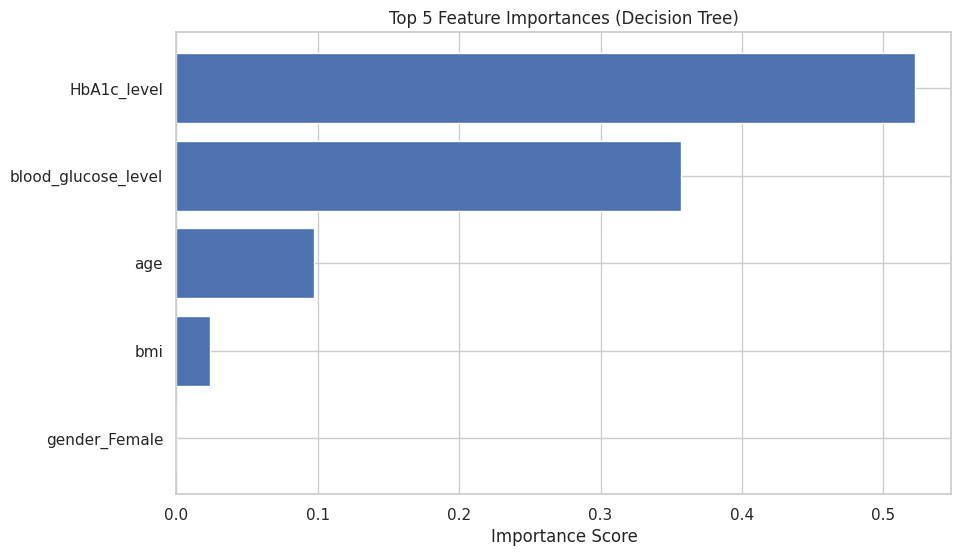

In [66]:
# Plot Feature Importance
plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'][:5], fi_df['Importance'][:5])
plt.gca().invert_yaxis()
plt.title("Top 5 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()

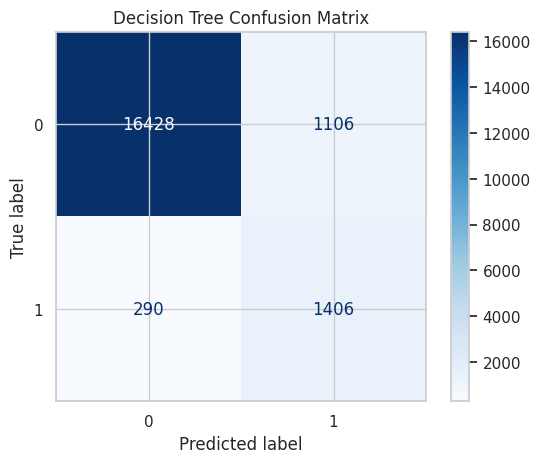

In [67]:
# Plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Phase 5 Summary
In this phase, we focused on the decision tree model performance, trying to understand how the final model makes predictions and what business insights can be concluded from the results.

- From our Decision Tree Model, feature importance scores were used to determine which factors contributed most to predicting diabetes.

- The feature importance results showed that blood glucose level and HbA1c level were by far the most influential predictors in the model. This aligns strongly with medical standards.

- Age and BMI  had smaller but still meaningful contributions, indicating that lifestyle and health conditions also play supporting roles in diabetes risk. The interpretability of the model confirms that it is identifying medically valid patterns rather than learning noise.

- To better understand the model's strengths and weaknesses, the confusion matrix was examined.

- The Decision Tree performed well at correctly identifying diabetic patients, meaning it successfully captured individuals who are at risk. However, because diabetes is relatively rare in the dataset, some false positives occurred patients were predicted as diabetic when they were not. While not ideal, this is acceptable in a healthcare context, where missing a true diabetic case would be far more harmful than issuing an extra precautionary follow-up.

## Business Insights

- The model can support early diabetes screening by flagging individuals with elevated glucose or HbA1c levels for further testing. Healthcare providers could use the model to prioritize outreach for older patients or those with high BMI, even if glucose and HbA1c levels are borderline.

- Public health departments could also use these predictions to target education campaigns toward populations with higher metabolic risk.

- Our model demonstrates how structured patient data can help identify at-risk individuals earlier, potentially reducing long-term healthcare costs and improving patient outcomes.


# Phase 6: Ethics and Responsible Machine Learning

In our final phase, we shift our focus to the ethical responsibilities involved in building and using a predictive health model.

- Privacy and security are extremely important because this project involves medical data.

- In real-world clinical settings, patient information must follow strict regulations such as HIPAA. Data must be anonymized, stored securely, and never shared without permission. Any system built on this type of data must avoid exposing personal details through logs, reports, or external files.

- A major consideration should be how the model is used in practice. A machine-learning model should never act as the final decision-maker. Even though the model identified important predictors like blood glucose and HbA1c levels, it is not a replacement for a medical professional. Instead, it should be treated as a supportive screening tool that helps highlight patients who may need additional testing or follow-up.

- Any deployment of this model would need clear disclaimers and usage guidelines approved by senior healthcare analystics and medical professionals.
